QVAPOR OK
T OK
(305, 305) (305, 305) (305, 306) (306, 305)


ValueError: The rows of 'x' must be equal

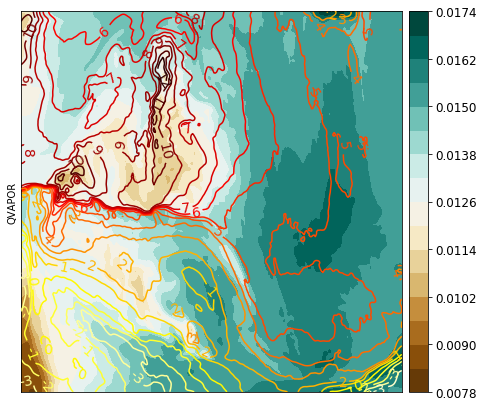

In [51]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

import cartopy.crs as crs
import cartopy._crs as _ccrs

from matplotlib.cm import get_cmap
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy,get_basemap, cartopy_xlim,
                 cartopy_ylim, latlon_coords)
import wrf



def mapa_somb_cont2(path = '../../../../media/agustin/Linux/salidas_wrf/test01/',
                   archivo = 'wrfout_d02_2018-11-10_12:00:00',
                   var_s = '0',  ts = 0,   lev_s = 0  , us = 0 , cmap_s = 'coolwarm', 
                   var_c1 = '0', tc1 = -1, lev_c1 = 0 , uc1 = 0, cmap_c1 = 0,
                   var_c2 = '0', tc2 = -1, lev_c2 = 0 , uc2 = 0, cmap_2 = 0,
                   viento = False, lev_viento = 0,sep_barb = 1,
                   titulo = 'Sin titulo definido', guardar = False):
    
    """CARGA DE DATOS"""
    data = Dataset(path+archivo,'r')

    lat = getvar(data,'XLAT')
    lon = getvar(data,'XLONG')
    time = getvar(data,'Times')
    znw = getvar(data,'ZNW', timeidx=wrf.ALL_TIMES)
    
    if tc1 == -1: tc1 = ts
    if tc2 == -1: tc2 = ts
    if lev_c1 == -1: lev_c1 = lev_s
    if lev_c2 == -1: lev_c2 = lev_s
    
    ks,kc1,kc2 = 1, 1, 1
    
    n_var_s = var_s
    n_var_c1 = var_c1
    n_var_c2 = var_c2

    
    for i in ts:


        if n_var_s != '0':
            if (type (n_var_s)== str) and (type(i) == int):
                print(n_var_s + ' OK')
                
                if var_s == 'QVAPOR': ks = 1000
                var_s = getvar(data,n_var_s, timeidx = i)#, units = us)# if type(us)==str else None)
                
                if len (var_s.shape)>2: var_s = var_s[lev_s,...]
                smooth_var_s = smooth2d(var_s, 3, cenweight=4)
                lats, lons = latlon_coords(var_s)

                bm = get_basemap(var_s)
                somb = True         
            else:
                display (type(n_var_s), type(i))

                print("""\033[1;32m La variable tiene que estar escrita como string y el tiempo como int \n 
                      Si no escribis ts por default es 0 \033[0m""")
                return 0
        else: somb = False
        if n_var_c1 != '0':
            if (type(n_var_c1) == str) and (type(i) == int):
                print(n_var_c1 +' OK')
                if n_var_c1 == 'QVAPOR': kc1 = 1000
                var_c1 = getvar(data,n_var_c1,timeidx= i)#, units = uc1 if type(uc1)==str else None)
                
                if len (var_c1.shape)>2: var_c1 = var_c1[lev_c1,...]
                smooth_var_c1 = smooth2d(var_c1, 3, cenweight=4)
                lats, lons = latlon_coords(var_c1)
                
                bm = get_basemap(var_c1)

                
                cont1 = True    
            else: 
                display (type(n_var_c1), type(i))
                print("""\033[1;32m La variable tiene que estar escrita como string y el tiempo como int \n 
                      Si no escribis tc1 por default es 0 \033[0m""")
                return 0
        else: cont1 = False

        if n_var_c2 != '0':
            if (type(n_var_c2)== str) and (type(i) == int):
                print(n_var_c2 + ' OK')

                if n_var_c2 == 'QVAPOR': kc2 = 1000
                var_c2 = getvar(data,n_var_c2,timeidx=i)#, units = uc2 if type(uc2)==str else None)
                
                if len (var_c2.shape)>2: var_c2 = var_c2[lev_c2,...]
                smooth_var_c2 = smooth2d(var_c2, 3, cenweight=4)

                cont2 = True    
            else: 
                display (type(n_var_c2), type(i))
                print("""\033[1;32m La variable tiene que estar escrita como string y el tiempo como int \n 
                      Si no escribis tc2 por default es 0 \033[0m""")
                return 0
        else: cont2 = False
            
        if viento == True:
            a=sep_barb
            
            v_x = getvar(data,'U', timeidx= i )[lev_viento,...]
            v_y = getvar(data, 'V', timeidx= i) [lev_viento,...]          
            



        #####################################

        l=i%24
        d=int(i/24)+12 
    
        """""""""ACA EMPIEZA EL MAPA"""""""""

        fig, ax = plt.subplots(1,figsize = (10,7))

        x, y = bm(to_np(lons), to_np(lats))

        if somb == True:

            if len(smooth_var_s.shape) == 3: var_s = to_np(smooth_var_s[i,...])
            else: var_s = to_np(smooth_var_s)

            ps = ax.contourf(x, y, var_s,15 , cmap = plt.get_cmap(cmap_s))
            cbar = bm.colorbar(ps, location = 'right', shrink=1) 

            cbar.ax.tick_params(labelsize=12)

        if cont1 == True:
            
            if len(smooth_var_c1.shape) == 3: var_c1 = to_np(smooth_var_c1[i,...])
            else: var_c1 = to_np(smooth_var_c1)

            c1_min, c1_max, ncont_1 =np.min(var_c1),np.max(var_c1), 20

            clev=np.linspace(c1_min,c1_max,ncont_1)
            pc1 = bm.contour(x,y, var_c1,clev, cmap = plt.get_cmap(cmap_c1))
            plt.ylabel(n_var_s)
            clab = plt.clabel(pc1,clev,fontsize=14,fmt='%.00f')


        if cont2 == True:
            
            if len(smooth_var_c2.shape) == 3: var_c2 = to_np(smooth_var_c2[i,...])
            else: var_c2 = to_np(smooth_var_c2)
            pc2 = ax.contour(x,y, var_c2) 
            
        if viento == True:
            
            x_v = x[::a,::a]
            y_v = y[::a,::a]
            v_x = v_x[::a,::a]
            v_y = v_y[::a,::a]

            print(x_v.shape,y_v.shape,v_x.shape,v_y.shape)
            #speed = np.sqrt((v_x*2) ** 2 + (v_y*2) ** 2)
            #lw = 4*speed / speed.max()
            vi=ax.streamplot(x_v, y_v, v_x, v_y,
                            color = 'limegreen', linewidth= 1)

        minlat = np.round(np.min(lat))
        minlon = np.round(np.min(lon))
        maxlat = np.round(np.max(lat))
        maxlon = np.round(np.max(lon))

        lozada = [-31.651943,-64.07947]


        bm.drawcoastlines(linewidth=0.25)
        bm.drawstates(linewidth=0.5)
        bm.drawcountries(linewidth=0.25)



        plt.tight_layout()

        plt.title(titulo+" %s-%s utc" %(l,d), fontsize = 16)


        if guardar==True:
            plt.savefig("img/"+titulo+"%s-%sutc" 
                        %(l,d),format='png')

        plt.show()

    data.close()
    
        
mapa_somb_cont2(var_s = 'QVAPOR',var_c1='T', 
                ts = [10,12,16],tc1 = 10, titulo='Temperatura a 2 m',
               cmap_s = 'BrBG',cmap_c1='hot_r', viento = True)
               


### Los datos de WRF estan el el disco externo

In [41]:
path = '../../../../media/agustin/Linux/salidas_wrf/test01/'
archivo = 'wrfout_d02_2018-11-10_12:00:00'
data = Dataset(path+archivo,'r')

data.variables.keys()

odict_keys(['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS', 'VAR_SSO', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'THM', 'HFX_FORCE', 'LH_FORCE', 'TSK_FORCE', 'HFX_FORCE_TEND', 'LH_FORCE_TEND', 'TSK_FORCE_TEND', 'MU', 'MUB', 'NEST_POS', 'P', 'PB', 'FNM', 'FNP', 'RDNW', 'RDN', 'DNW', 'DN', 'CFN', 'CFN1', 'THIS_IS_AN_IDEAL_RUN', 'P_HYD', 'Q2', 'T2', 'TH2', 'PSFC', 'U10', 'V10', 'RDX', 'RDY', 'RESM', 'ZETATOP', 'CF1', 'CF2', 'CF3', 'ITIMESTEP', 'XTIME', 'QVAPOR', 'QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP', 'SHDMAX', 'SHDMIN', 'SNOALB', 'TSLB', 'SMOIS', 'SH2O', 'SMCREL', 'SEAICE', 'XICEM', 'SFROFF', 'UDROFF', 'IVGTYP', 'ISLTYP', 'VEGFRA', 'GRDFLX', 'ACGRDFLX', 'ACSNOM', 'SNOW', 'SNOWH', 'CANWAT', 'SSTSK', 'COSZEN', 'LAI', 'DTAUX3D', 'DTAUY3D', 'DUSFCG', 'DVSFCG', 'VAR', 'CON', 'OA1', 'OA2', 'OA3', 'OA4', 'OL1', 'OL2', 'OL3', 'OL4', 'MAPFAC_M', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_VX', 'MF_VX_INV', 'MAPFAC_VY', 'F', 'E', 'SINALPHA', 'C

In [1]:
def somb_cont (variable, titulo,cmap = 'viridis',  lev =0 , tiempo = 0, dl=2.):


    if len(variable.shape) == 4:
        var = variable[tiempo, lev,:,:]

    elif len(variable.shape) == 3:
        var = variable[tiempo,:,:]

    smooth_var = smooth2d(var, 3, cenweight=4)

    lats, lons = latlon_coords(var)

    bm = get_basemap(var)

    
    fig = plt.figure(figsize=(6,6))

    ax = plt.subplots(1)
    

    x, y = bm(to_np(lons), to_np(lats))

    plt.contourf(x, y, to_np(smooth_var),15 , cmap=get_cmap(cmap))

    [ptlat,ptlon] = [-31.651739700-dl/2.,-64.097784300-dl/2.]

    bm.plot([ptlon,ptlon],[ptlat,ptlat+dl],'-k',linewidth=2)
    bm.plot([ptlon,ptlon+dl],[ptlat+dl,ptlat+dl],'-k',linewidth=2)
    bm.plot([ptlon+dl,ptlon+dl],[ptlat+dl,ptlat],'-k',linewidth=2)
    bm.plot([ptlon+dl,ptlon],[ptlat,ptlat],'-k',linewidth=2)
    
    
    bm.drawcoastlines(linewidth=0.25)
    bm.drawstates(linewidth=0.25)
    bm.drawcountries(linewidth=0.25)
    
    plt.colorbar(shrink=.7)

    plt.title(titulo)

    plt.tight_layout()
    
    plt.show()

somb_cont(variable= t ,tiempo = 0, cmap = 'coolwarm', titulo = 'Temperatura')

NameError: name 't' is not defined

In [7]:
x,y = m(255,146)
x_,y_ = m(lat,lon)
#plt.subplot2grid((1,2),(0,0))
m.imshow(t[0,10,:,:],cmap=plt.get_cmap('coolwarm'))
m.scatter(146,255)#,s=1000)

#plt.scatter(x,y,marker='o',s=100,color='r')
m.drawparallels(np.arange(minlat,maxlat,5),labels = [0.5,0,0,0], fontsize = 10, linewidth = 0.4)
m.drawmeridians(np.arange(minlon,maxlon,10),labels=[0,0,0,0.3],fontsize = 10, linewidth = 0.4)
m.drawcoastlines(linewidth = 0.6)
m.drawcountries(linewidth = 0.5)
m.drawstates(linewidth = 0.4)
lon_ = lon[0,146]
lat_ = lat[255,0]
x,y = m(lon_, lat_)
loz = m.plot(x, y, 'bo', markersize=24)
#plt.plot(146,255,marker='o',color='r')

plt.show()

NameError: name 'm' is not defined

IndexError: too many indices

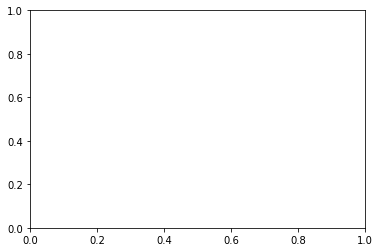

In [120]:
fig ,ax= plt.subplots(1)

dl=2.
[ptlat,ptlon] = [-31.651739700-dl/2.,-64.097784300-dl/2.]
plt.contourf(lon[0,:,:],lat[0,:,:],t[0,0,:,:])
plt.plot([ptlon,ptlon],[ptlat,ptlat+dl],'-k',linewidth=2)
plt.plot([ptlon,ptlon+dl],[ptlat+dl,ptlat+dl],'-k',linewidth=2)
plt.plot([ptlon+dl,ptlon+dl],[ptlat+dl,ptlat],'-k',linewidth=2)
plt.plot([ptlon+dl,ptlon],[ptlat,ptlat],'-k',linewidth=2)
#a= mpach.Rectangle((210,116),40,30,linewidth=1,edgecolor='r',facecolor='none')
#ax.add_patch(a)

plt.show()